In [30]:
library(WRS2)
library(tidyverse)
library(effsize)
library(rogme)
library(gridExtra)
library(cowplot)


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




Stats for N2 amplitude on nogo smoking cue trial
-------------------------------------------------------------------------

In [70]:
df<-read.csv('min_amp_n2.csv')

df$Session<-recode_factor(df$Session, '1'='pre', '2'='post' )

In [72]:
df$Subject<-factor(df$Subject)
df$Session<-factor(df$Session)


In [73]:
df<-df%>% group_by(Groupe, Session, Subject)


In [16]:
df

X,Subject,Session,Groupe,Fz
<int>,<fct>,<fct>,<fct>,<dbl>
0,0,1,ctr,-7.571627e-06
1,1,1,ctr,-8.285281e-06
2,2,1,ctr,-3.371691e-06
3,3,1,ctr,-8.855425e-06
4,4,1,ctr,-8.233247e-06
5,5,1,ctr,-6.754913e-06
6,6,1,ctr,-2.878520e-06
7,7,1,ctr,-7.394303e-06
8,8,1,ctr,-7.192671e-06


In [159]:
# robust mixed design anova (2 samples repeated measures)
bwtrim(Fz~Groupe*Session, id=Subject, data=df)

Call:
bwtrim(formula = Fz ~ Groupe * Session, id = Subject, data = df)

                value df1     df2 p.value
Session        0.2213   1 24.8359  0.6422
Groupe         0.0072   1 23.1231  0.9330
Session:Groupe 6.3220   1 23.1231  0.0193


Both main effects (group and session) are non significant, but the interaction session x group is significant

In [149]:
# post hoc test on interaction
sppbi(Fz~Groupe*Session, id=Subject, data=df)

Call:
sppbi(formula = Fz ~ Groupe * Session, id = Subject, data = df)

Test statistics:
                   Estimate
ctr-int pre-post -3.252e-06

Test whether the corrresponding population parameters are the same:
p-value: 0.01 


We can reject H0 of equal differences in amplitude in group x sessopm

In [155]:
aggregate(Fz~Groupe*Session ,data=df, mean, trim=0.2)

Groupe,Session,Fz
<fct>,<fct>,<dbl>
ctr,pre,-6.263949e-06
int,pre,-4.730924e-06
ctr,post,-5.117218e-06
int,post,-6.549951e-06


post hoc test

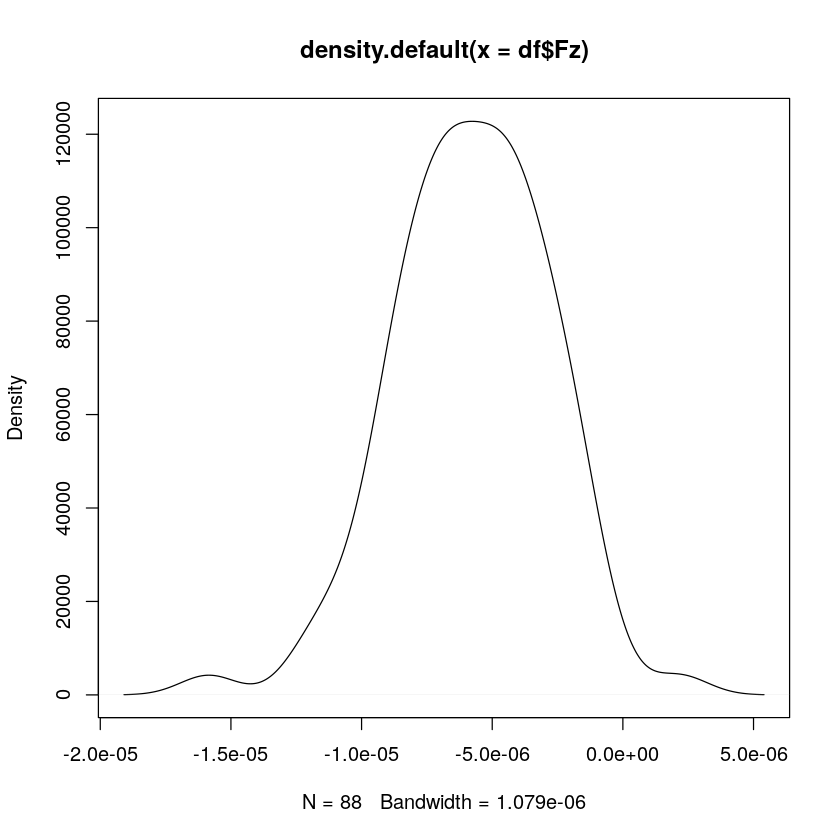

In [139]:
dens_n2<- density(df$Fz)
plot(dens_n2)

In [76]:
df_pre<-df %>% filter(Session=='pre')
df_post<-df %>% filter(Session=='post')

df_int<-df %>% filter(Groupe=='int')
df_ctr<-df %>% filter(Groupe=='ctr')


In [156]:
df_int_post<-df_int %>% filter(Session =='post')
df_int_pre<-df_int %>% filter(Session =='pre')
df_ctr_post<-df_ctr %>% filter(Session =='post')
df_ctr_pre<-df_ctr %>% filter(Session =='pre')

Effect sizes

In [157]:
ks(df_int_post$Fz,df_ctr_post$Fz )

$test
[1] 0.3181818

$critval
[1] 0.409483

$p.value
[1] 0.1092617

In [158]:
ks(df_int_pre$Fz,df_ctr_pre$Fz )

$test
[1] 0.3181818

$critval
[1] 0.409483

$p.value
[1] 0.1587738

based on https://garstats.wordpress.com/2016/07/19/typical-differences/

In [78]:
theme_set(theme_cowplot())

Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown par

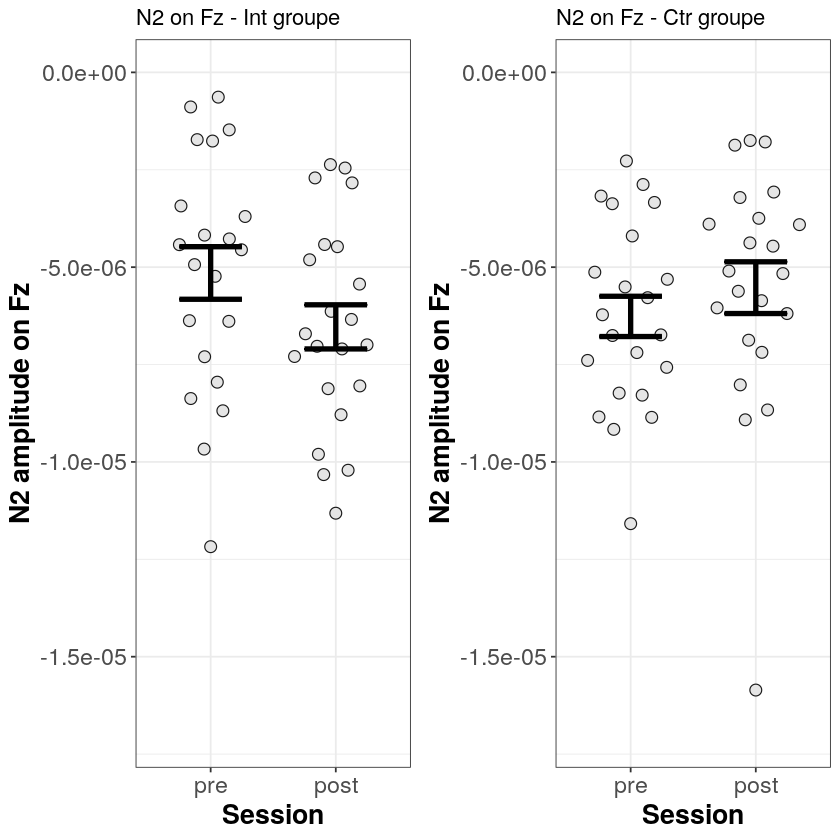

In [79]:
ps1<-plot_scat2(df_int, 
               formula=Fz~Session,
               ylabel="N2 amplitude on Fz", 
                alpha = 1,
                shape = 21,
                colour = "grey10",
                fill = "grey90",
                size = 3)+
    scale_y_continuous(limits = c(-1.7e-05, 0))
              
              
#ps1<-ps1+coord_flip()
strip1 <- plot_hd_bars(ps1, 
                     col="black", 
                    q_size = 0.5,
                      md_size = 1.5,
                      alpha = 1)

#ps1<-ps1+strip


strip1<-strip1+ggtitle('N2 on Fz - Int groupe')

ps2<-plot_scat2(df_ctr, 
               formula=Fz~Session,
               ylabel="N2 amplitude on Fz", 
               alpha = 1,
                shape = 21,
                colour = "grey10",
                fill = "grey90",
                size = 3)+
    scale_y_continuous(limits = c(-1.7e-05, 0))

              

strip2 <- plot_hd_bars(ps2, 
                     col="black", 
                    q_size = 0.5,
                      md_size = 1.5,
                      alpha = 1)

#ps2<-ps2+strip2
strip2<- strip2+ggtitle('N2 on Fz - Ctr groupe')


grid.arrange(strip1, strip2, ncol=2)
            
#ps2<-ps2+coord_flip()

In [81]:
df_int_wide<-pivot_wider(df_int, 
           names_from=Session, values_from=Fz)

In [106]:
#shift function

df_int_pre<-df_int$Fz[df_int$Session=='pre']
df_int_post<-df_int$Fz[df_int$Session=='post']

df_int<-mkt2(df_int_pre, df_int_post)

df_int$gr<-recode_factor(df_int$gr, 'Group1'='pre', 'Group2'='post' )

sf <- shiftdhd(data = df_int, formula = obs ~ gr, nboot = 1000)

psf <- plot_sf(sf, plot_theme = 2)[[1]] 

Warning message:
“Using alpha for a discrete variable is not advised.”
Warning message:
“Using alpha for a discrete variable is not advised.”
Scale for 'alpha' is already present. Adding another scale for 'alpha', which
will replace the existing scale.



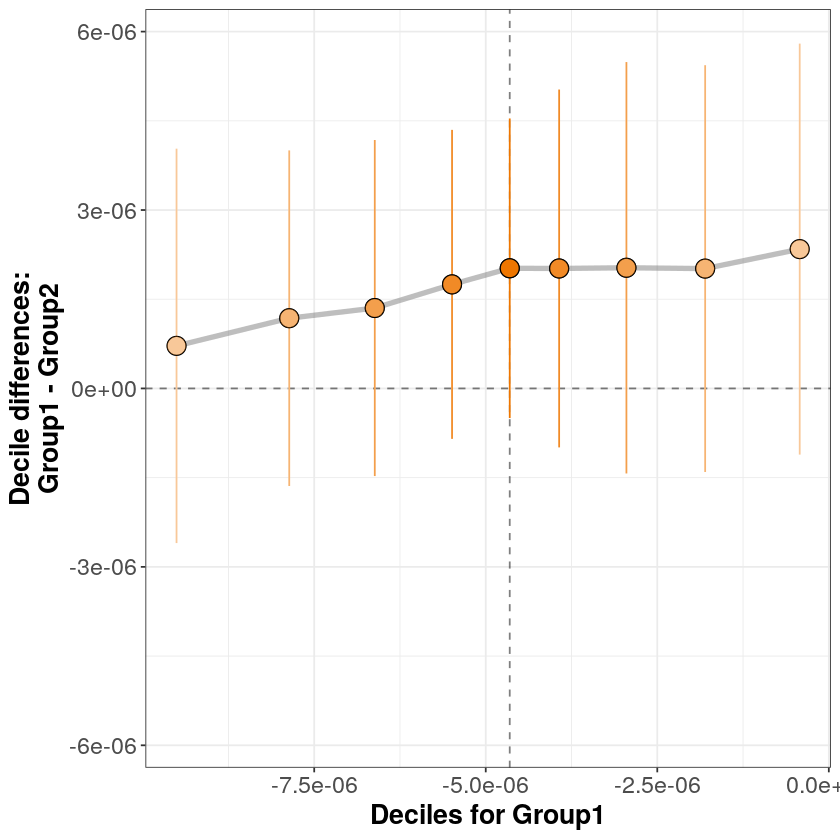

In [95]:
psf

Warning message:
“Using alpha for a discrete variable is not advised.”
Warning message:
“Using alpha for a discrete variable is not advised.”
Scale for 'alpha' is already present. Adding another scale for 'alpha', which
will replace the existing scale.



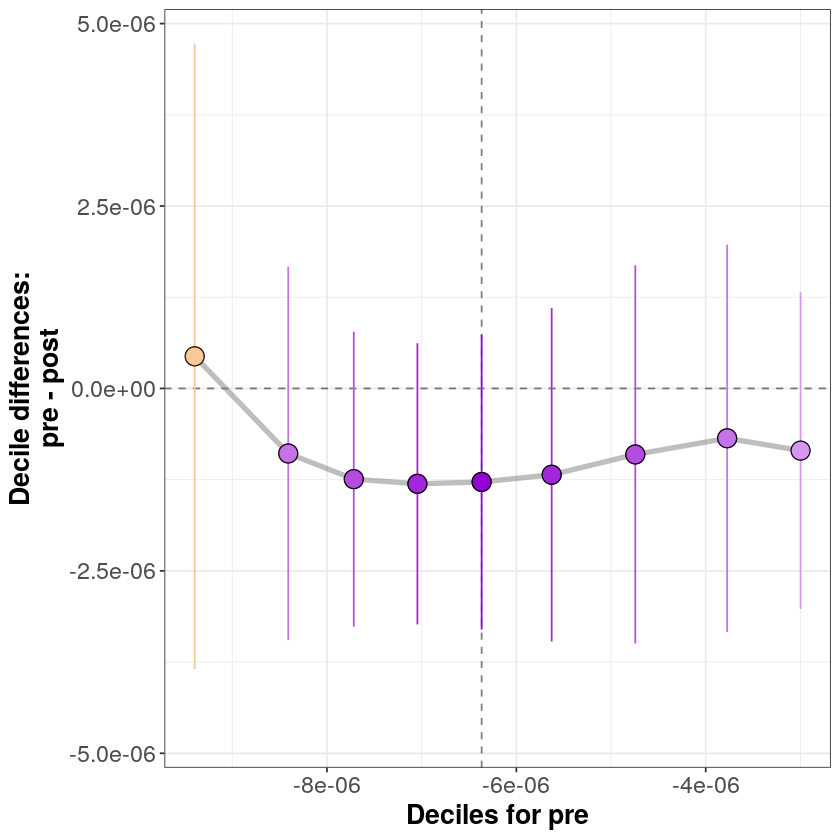

In [111]:
df_ctr_pre<-df_ctr$Fz[df_ctr$Session=='pre']
df_ctr_post<-df_ctr$Fz[df_ctr$Session=='post']

df_ctr<-mkt2(df_ctr_pre, df_ctr_post)

df_ctr$gr<-recode_factor(df_ctr$gr, 'Group1'='pre', 'Group2'='post' )

sf2 <- shiftdhd(data = df_ctr, formula = obs ~ gr, nboot = 1000)

psf2 <- plot_sf(sf2, plot_theme = 2)[[1]] 

psf2

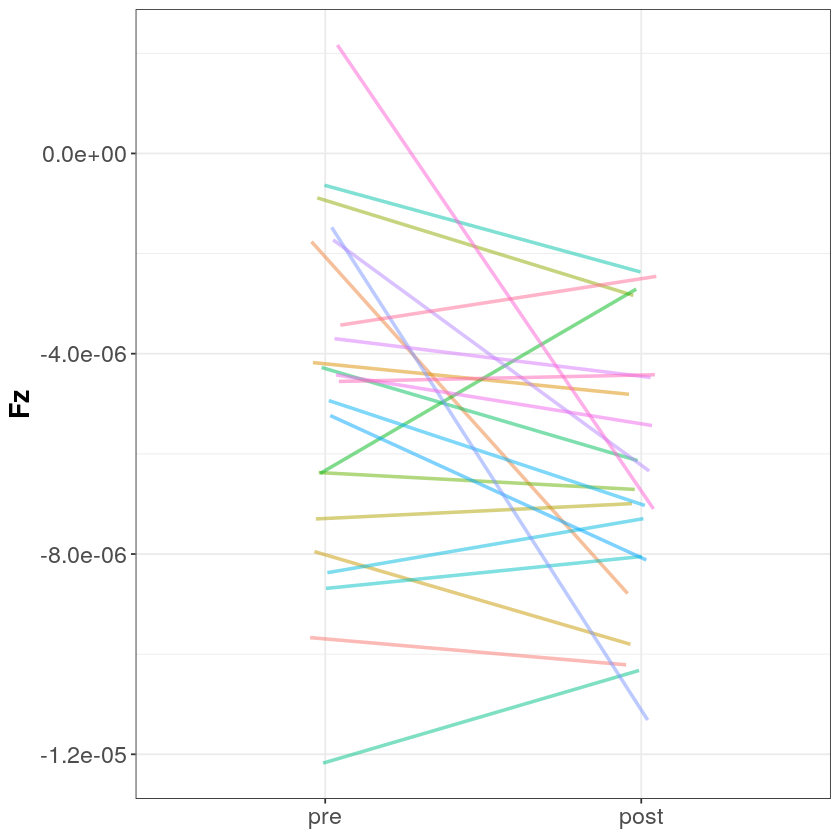

In [113]:
pd <- position_dodge(width = 0.1)
linkedstrip_int <- ggplot(df_int, aes(x=Session, y=Fz, group=Subject)) +
                geom_line(aes(colour=Subject),size=1, alpha=.5,
                          position=pd) +
                theme_bw() +
                theme(axis.text.x = element_text(size=14),
                      axis.text.y = element_text(size=14),
                      axis.title.x = element_blank(),
                      axis.title.y = element_text(size=16,face="bold"),
                      legend.position="none") #+
                #> labs(title="Paired observations") +
                #ylab("Scores (a.u.)") #+
                #scale_x_discrete(labels = c("pre" = "Pre-test","condition2" = "Condition 2")) +
                #scale_y_continuous(limits=c(0, 30),breaks=seq(0,30,5))
linkedstrip_int

In [115]:
df_ctr

gr,obs
<fct>,<dbl>
pre,-7.571627e-06
pre,-8.285281e-06
pre,-3.371691e-06
pre,-8.855425e-06
pre,-8.233247e-06
pre,-6.754913e-06
pre,-2.878520e-06
pre,-7.394303e-06
pre,-7.192671e-06


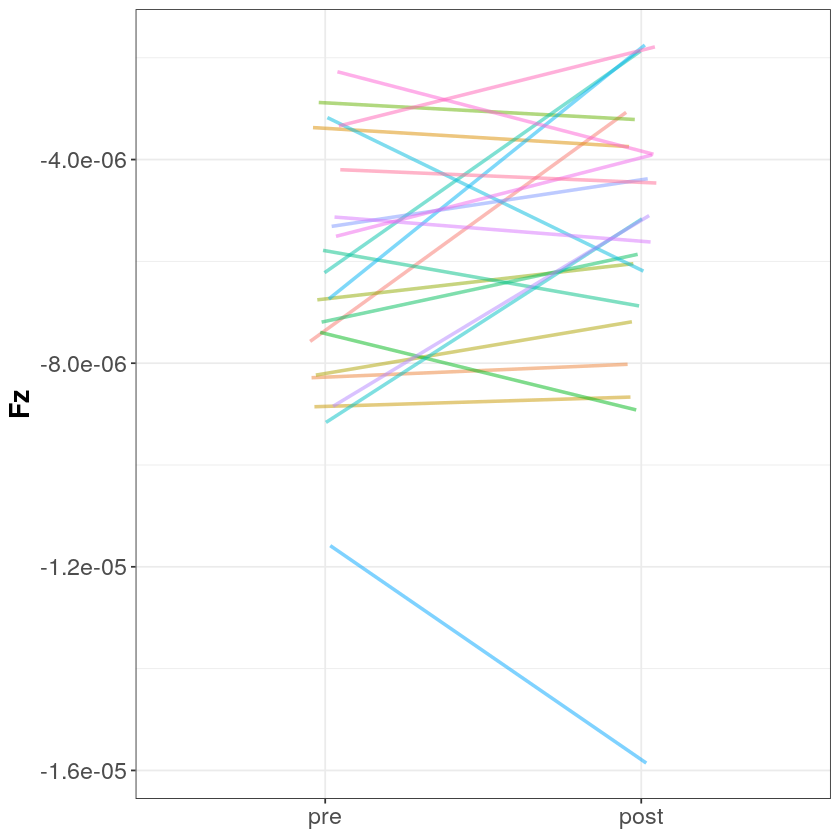

In [117]:
pd <- position_dodge(width = 0.1)
linkedstrip_ctr <- ggplot(df_ctr, aes(x=Session, y=Fz, group=Subject)) +
                geom_line(aes(colour=Subject),size=1, alpha=.5,
                          position=pd) +
                theme_bw() +
                theme(axis.text.x = element_text(size=14),
                      axis.text.y = element_text(size=14),
                      axis.title.x = element_blank(),
                      axis.title.y = element_text(size=16,face="bold"),
                      legend.position="none") #+
                #> labs(title="Paired observations") +
                #ylab("Scores (a.u.)") #+
                #scale_x_discrete(labels = c("pre" = "Pre-test","condition2" = "Condition 2")) +
                #scale_y_continuous(limits=c(0, 30),breaks=seq(0,30,5))
linkedstrip_ctr

In [138]:
scatterdiff <- plot_scat2d(df = df_int_wide,
                           formula = post ~ pre,
                           #axis.steps=5,
                           colour_p = "grey10",
                           fill_p = "grey90",
                           size_p = 4,
                           alpha_p = 1,
                           colour_q = "black",
                           alpha_q = 1,
                           linetype_q = "longdash")+
                           #size_q = c(0.5,1,0.5)) +
  xlab("Pre-test") +
  ylab("Post-Test") +
  theme(plot.title = element_blank())
scatterdiff

ERROR: Error in seq.default(floor(min.x), ceiling(max.x), axis.steps): 'from' must be a finite number


In [118]:
df_int_wide

X,Subject,Groupe,pre,post
<int>,<fct>,<fct>,<dbl>,<dbl>
44,0,int,-9.669966e-06,NA
45,1,int,-1.762627e-06,NA
46,2,int,-4.177510e-06,NA
47,3,int,-7.952485e-06,NA
48,4,int,-7.299421e-06,NA
49,5,int,-8.877110e-07,NA
50,6,int,-6.373511e-06,NA
51,7,int,-6.390802e-06,NA
52,8,int,-4.275106e-06,NA


Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean

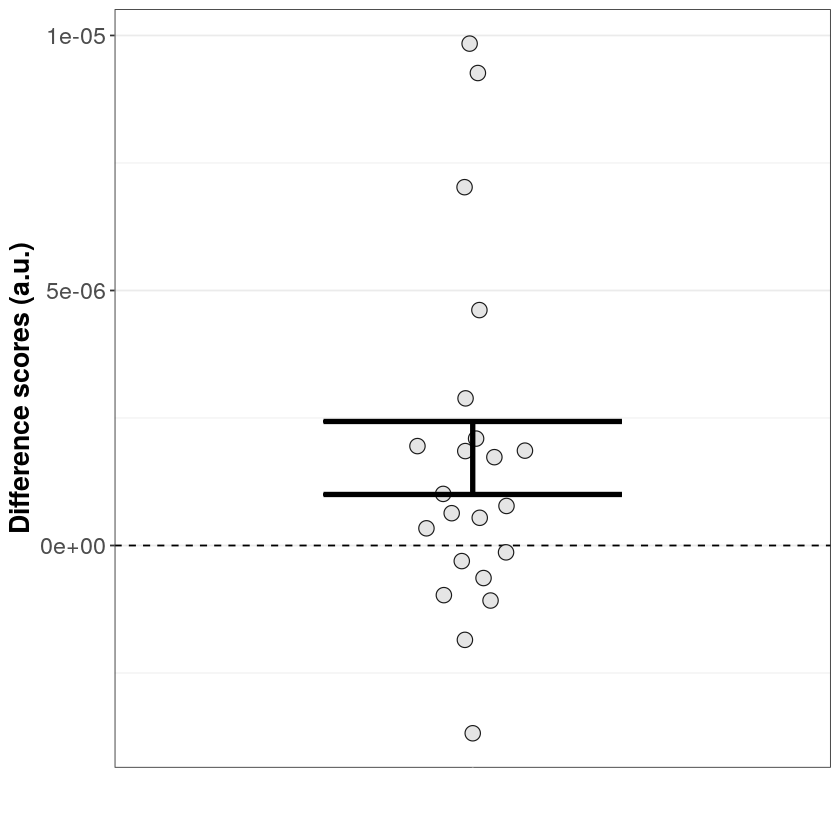

In [132]:
paired_differences <- df_int$Fz[df_int$Session=="pre"]-df_int$Fz[df_int$Session=="post"]
diff <- mkt1(paired_differences)
set.seed(8)
diffstrip <- ggplot(diff, aes(x=gr,y=obs,fill=gr,colour=gr,shape=gr)) +
  geom_abline(intercept = 0, slope = 0, linetype = 2) +
  ggbeeswarm::geom_quasirandom(alpha = 1,
             shape = 21,
             colour = "grey10",
             fill = "grey90",
             size = 4,
             width = .1) +
  theme_bw() +
  theme(legend.position="none",
        axis.ticks.x = element_line(colour="white"),
        axis.text.x = element_text(size=14,colour="white"),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=16,face="bold",colour="white"),
        axis.title.y = element_text(size=16,face="bold"),
        plot.title = element_text(colour="black",size=20),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank()) +
  xlab("Differences") +
  ylab("Difference scores (a.u.)") #+
  #scale_y_continuous(limits=c(-7, 2),breaks=seq(-7,2,1))
diffstrip <- plot_hd_bars(diffstrip,
                           col = "black",
                           q_size = 0.5,
                           md_size = 1.5,
                           alpha = 1)
diffstrip

In [133]:
#> Compute confidence interval of the median of the paired differences
out <- hdpbci(paired_differences)

In [129]:
?hdpbci

In [128]:
out

$q
[1] 0.5

$estimate
[1] -1.060098e-06

$ci
[1] -2.047083e-06 -1.011242e-07

$n
[1] 22

$p.value
[1] 0.024

Difference asymmetry function

In [134]:
dasym <- asymdhd(diff, q = seq(5,40,5)/100, alpha = .05, nboot = 1000)

#> ggplot
diff_asym <- plot_diff_asym(data = dasym)[[1]] #+
  #scale_y_continuous(breaks = seq(-8, 8, 2), limits = c(-8, 8))

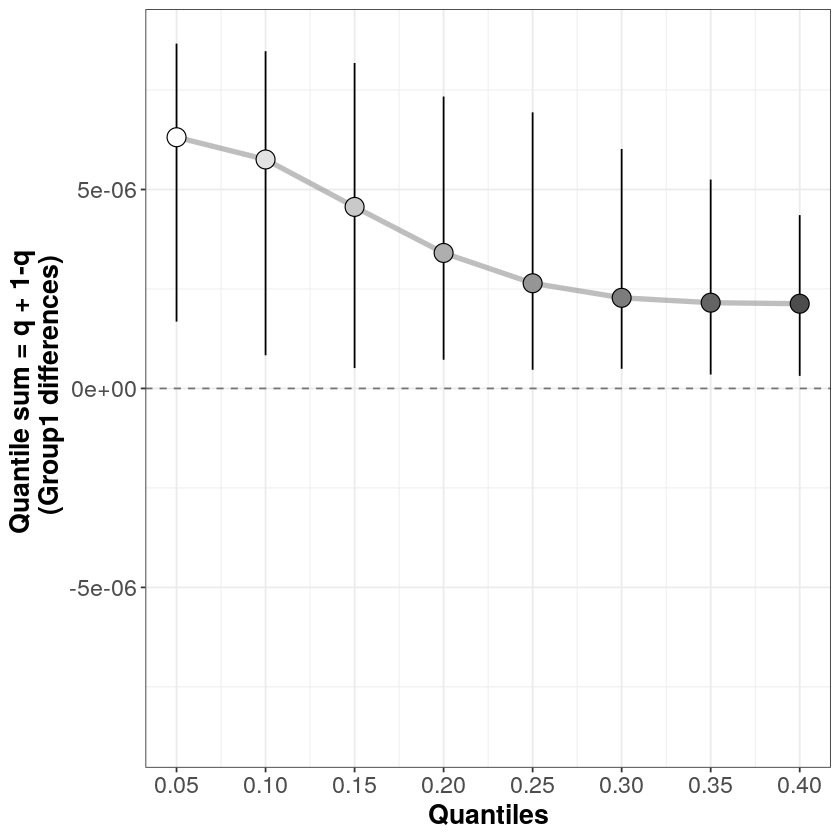

In [135]:
diff_asym

Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean_se()`

No summary function supplied, defaulting to `mean

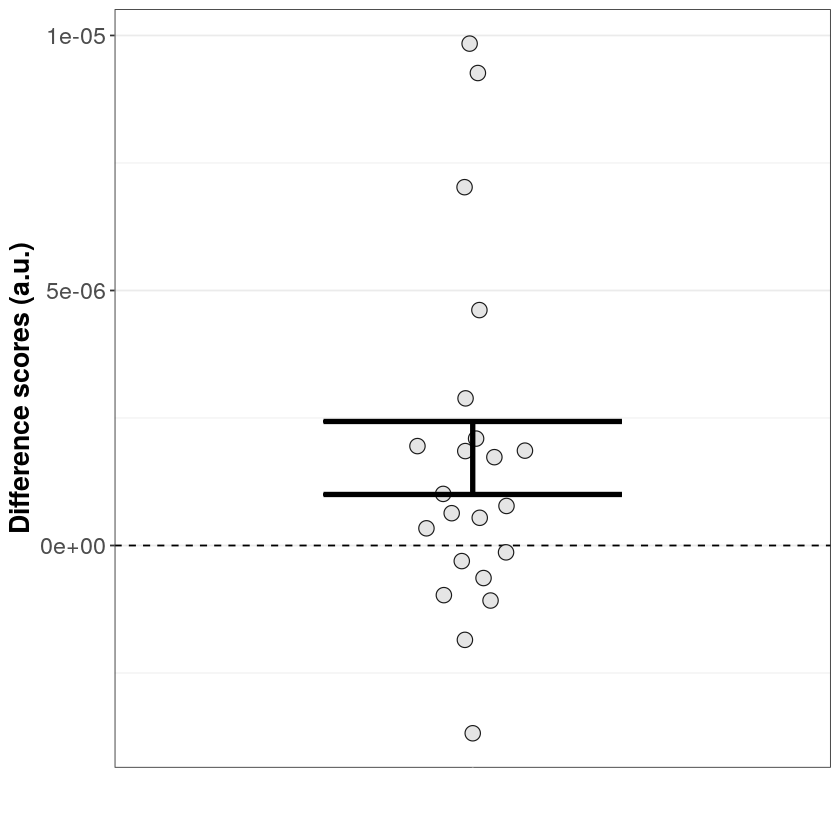

In [136]:
paired_differences_ctr <- df_ctr$Fz[df_int$Session=="pre"]-df_ctr$Fz[df_ctr$Session=="post"]
diff_ctr <- mkt1(paired_differences_ctr)
set.seed(8)
diffstrip_ctr <- ggplot(diff, aes(x=gr,y=obs,fill=gr,colour=gr,shape=gr)) +
  geom_abline(intercept = 0, slope = 0, linetype = 2) +
  ggbeeswarm::geom_quasirandom(alpha = 1,
             shape = 21,
             colour = "grey10",
             fill = "grey90",
             size = 4,
             width = .1) +
  theme_bw() +
  theme(legend.position="none",
        axis.ticks.x = element_line(colour="white"),
        axis.text.x = element_text(size=14,colour="white"),
        axis.text.y = element_text(size=14),
        axis.title.x = element_text(size=16,face="bold",colour="white"),
        axis.title.y = element_text(size=16,face="bold"),
        plot.title = element_text(colour="black",size=20),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank()) +
  xlab("Differences") +
  ylab("Difference scores (a.u.)") #+
  #scale_y_continuous(limits=c(-7, 2),breaks=seq(-7,2,1))
diffstrip_ctr <- plot_hd_bars(diffstrip_ctr,
                           col = "black",
                           q_size = 0.5,
                           md_size = 1.5,
                           alpha = 1)
diffstrip_ctr

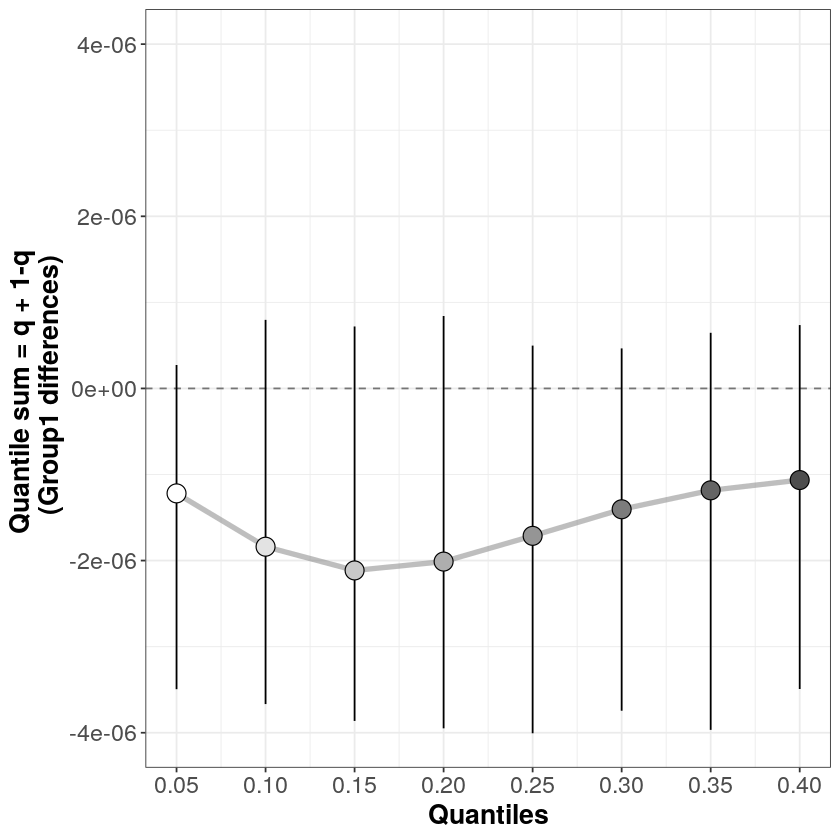

In [137]:
dasym_ctr <- asymdhd(diff_ctr, q = seq(5,40,5)/100, alpha = .05, nboot = 1000)

#> ggplot
diff_asym_ctr <- plot_diff_asym(data = dasym_ctr)[[1]] #+
  #scale_y_continuous(breaks = seq(-8, 8, 2), limits = c(-8, 8))

diff_asym_ctr